In [1]:
import pandas as pd

### Merge Annotated DFs together

In [2]:
anxiety = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/annotated_anxiety_data.csv")
mentalhealth = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/annotated_mentalhealth_data.csv")
selfharm = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/annotated_selfharm_data.csv")
suicidewatch = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/annotated_suicidewatch_data.csv")

In [3]:
# Merge the DataFrames
annotated_post_df = pd.concat([anxiety, mentalhealth, selfharm, suicidewatch], ignore_index=True)

# Save the merged DataFrame to a new CSV file
annotated_post_df.to_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/annotated_post_df.csv", index=False)

In [2]:
annotated_post_df = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/annotated_post_df.csv")

### Merge Non-Annotated DFs Together

In [32]:
na_anxiety = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/nonannotated_test_df/non-annotated_anxiety_testdata.csv")
na_mentalhealth = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/nonannotated_test_df/non-annotated_mentalhealth_testdata.csv")
na_selfharm = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/nonannotated_test_df/non-annotated_selfharm_testdata.csv")
na_suicidewatch = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/nonannotated_test_df/non-annotated_suicidewatch_testdata.csv")

In [33]:
# Merge the DataFrames
nonannotated_post_df = pd.concat([na_anxiety, na_mentalhealth, na_selfharm, na_suicidewatch], ignore_index=True)

# Save the merged DataFrame to a new CSV file
nonannotated_post_df.to_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/annotated_train_df/nonannotated_post_df.csv", index=False)

In [35]:
nonannotated_post_df = pd.read_csv("/Users/brittanyharding/LHL-Projects/SM-suicide_detection/nonannotated_post_df.csv")

### EDA - Check Data Contents

In [25]:
# Display the first few rows of the DataFrame
annotated_post_df.head(5)

,identifier,subreddit,post_date,username,post,classification
1517,t3_144ubz9,selfharm,2023-06-09 03:46:00,le_kitten,"i failed: relapsed after 111 days, im such a u...",Struggling
1516,t3_144ut31,selfharm,2023-06-09 04:10:00,Hotpot_Bunny,Wanting to destroy myself seems to be the only...,Struggling
1515,t3_144vc2u,selfharm,2023-06-09 04:37:00,wachassboi,50 days clean!: Guys this is my longest streak...,Recovery/Management
1514,t3_144vdj5,selfharm,2023-06-09 04:39:00,MoosifulMoose,forced to admit my shing because of my persist...,Support/Advice
1510,t3_144vs6k,selfharm,2023-06-09 05:00:00,haunte_sheep,in need of cut advice: Does anyone know when d...,Support/Advice


In [7]:
# Get the shape of the DataFrame (number of rows and columns)
print("Shape:", annotated_post_df.shape)
print()

# Check the data types of each column
print("Data Types:")
print(annotated_post_df.dtypes)
print()

# Count the number of posts in each classification
classification_counts = annotated_post_df['classification'].value_counts()
print("Classification Counts:")
print(classification_counts)
print()

# Calculate the percentage of each classification
classification_percentages = annotated_post_df['classification'].value_counts(normalize=True) * 100
print("Classification Percentages:")
print(classification_percentages)
print()

# Explore summary statistics of the post length
post_length_stats = annotated_post_df['post'].str.len().describe()
print("Post Length Summary Statistics:")
print(post_length_stats)

Shape: (2023, 6)

Data Types:
identifier        object
subreddit         object
post_date         object
username          object
post              object
classification    object
dtype: object

Classification Counts:
classification
Struggling             1246
Support/Advice          413
Crisis                  233
Recovery/Management     131
Name: count, dtype: int64

Classification Percentages:
classification
Struggling             61.591696
Support/Advice         20.415225
Crisis                 11.517548
Recovery/Management     6.475531
Name: proportion, dtype: float64

Post Length Summary Statistics:
count     2023.000000
mean       906.879881
std        925.178731
min         16.000000
25%        339.500000
50%        638.000000
75%       1172.000000
max      10883.000000
Name: post, dtype: float64


##### Dataset is currently very imbalanced... as 2000 random rows were selected (this number is slightly higher due to duplicate posts at different times in the anxiety subreddit) this may improve with further additional data. Nonetheless, Tt address the imbalance in NLP data, data augmentation techniques like oversampling and undersampling can be used to create a more balanced dataset. Additionally, assigning higher weights to the minority classes during model training helps the model focus on accurately predicting instances from these classes, ultimately improving performance on the imbalanced data.

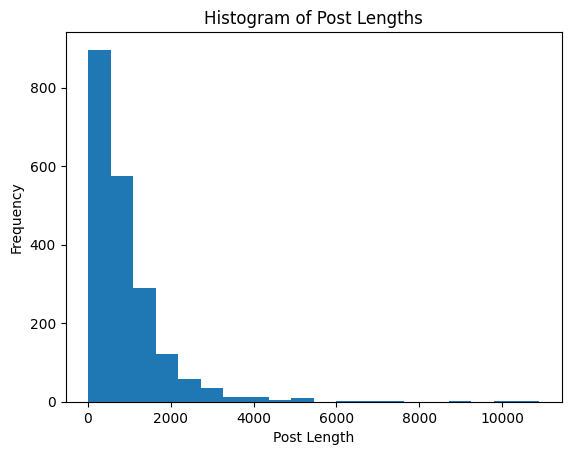

In [8]:
import matplotlib.pyplot as plt

# Plot a histogram of post lengths
plt.hist(annotated_post_df['post'].str.len(), bins=20)
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.title('Histogram of Post Lengths')
plt.show()

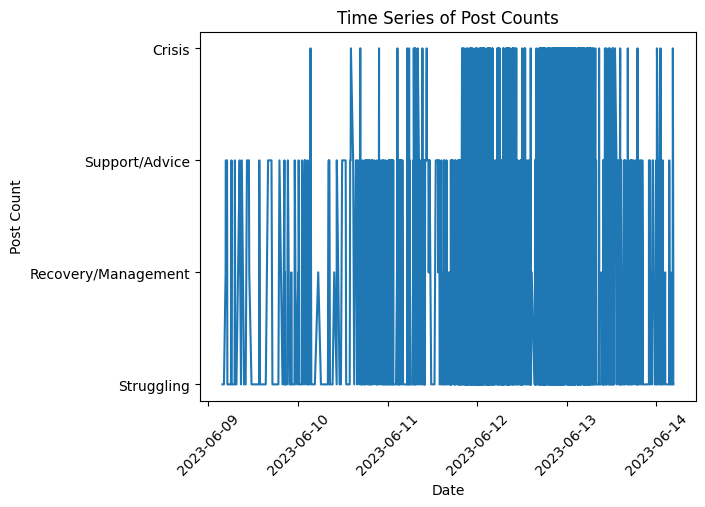

In [23]:
# Convert 'post_date' column to datetime type
annotated_post_df['post_date'] = pd.to_datetime(annotated_post_df['post_date'])

# Sort the DataFrame by 'post_date' in ascending order
annotated_post_df.sort_values('post_date', inplace=True)

# Plot a time series line plot of post counts
plt.plot(annotated_post_df['post_date'], annotated_post_df['classification'])
plt.xlabel('Date')
plt.ylabel('Post Count')
plt.title('Time Series of Post Counts')
plt.xticks(rotation=45)
plt.show()

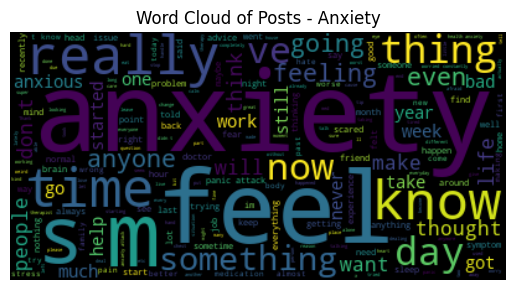

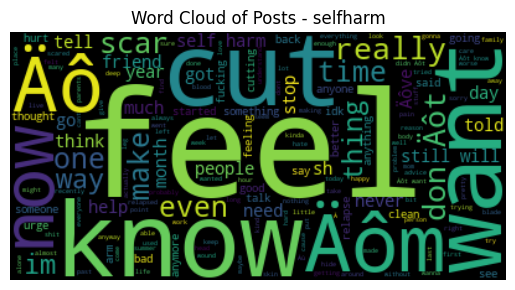

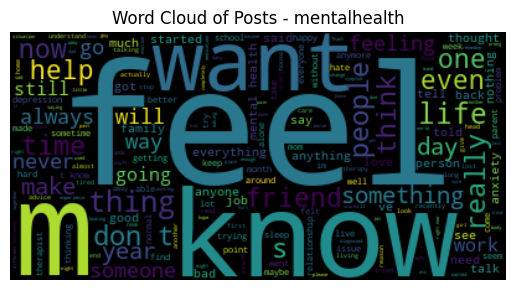

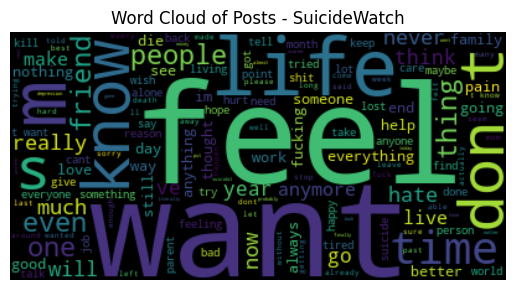

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the subreddits for word clouds
subreddits = ['Anxiety', 'selfharm', 'mentalhealth', 'SuicideWatch']

# Generate word clouds for each subreddit
for subreddit in subreddits:
    # Filter the data by subreddit
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]
    
    # Check if there are posts available
    if len(subreddit_data) > 0:
        # Filter out empty or non-word posts
        subreddit_data = subreddit_data[subreddit_data['post'].str.strip().str.len() > 0]
        
        # Generate word cloud from 'post' column
        wordcloud = WordCloud().generate(' '.join(subreddit_data['post']))

        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of Posts - {subreddit}')
        plt.show()
    else:
        print(f"No valid posts available for subreddit: {subreddit}")


In [28]:
subreddit_values = annotated_post_df['subreddit'].unique()
print(subreddit_values)

['selfharm' 'Anxiety' 'mentalhealth' 'SuicideWatch']


/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_13317/2726110751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


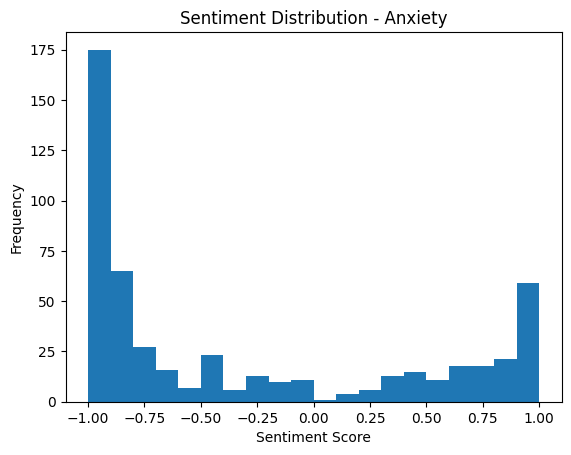

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_13317/2726110751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


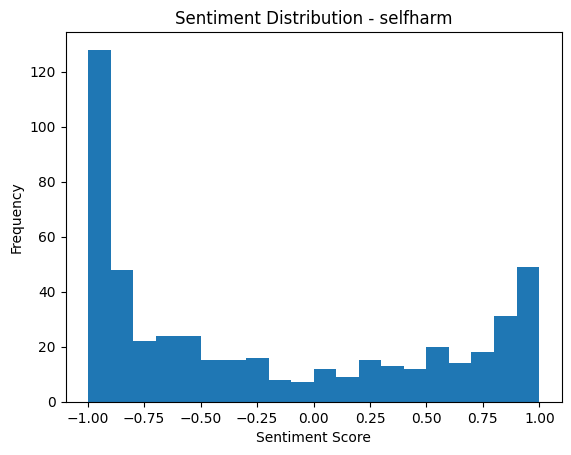

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_13317/2726110751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


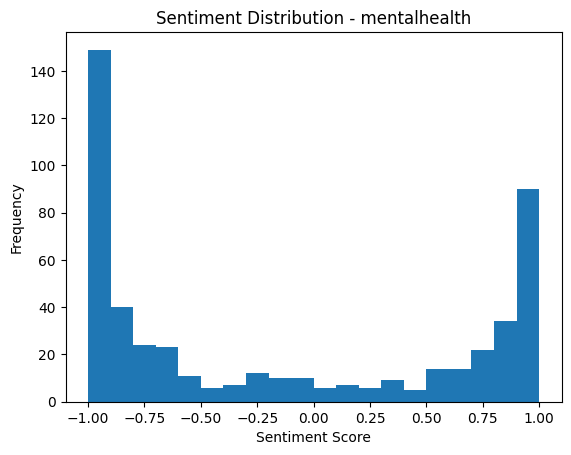

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_13317/2726110751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])


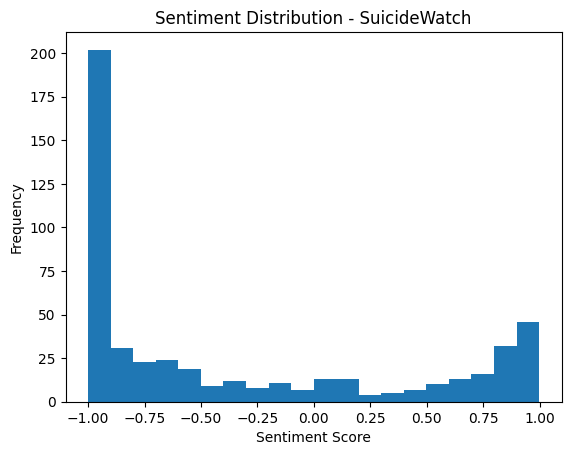

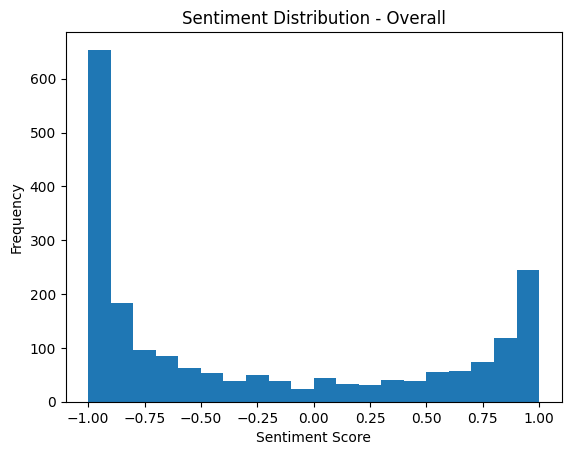

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Define the subreddits for sentiment analysis
subreddits = ['Anxiety', 'selfharm', 'mentalhealth', 'SuicideWatch']

# Perform sentiment analysis for each subreddit and plot sentiment distribution
for subreddit in subreddits:
    # Filter the data by subreddit
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]
    
    # Perform sentiment analysis on 'post' column
    sid = SentimentIntensityAnalyzer()
    subreddit_data['sentiment_score'] = subreddit_data['post'].apply(lambda x: sid.polarity_scores(x)['compound'])
    
    # Plot sentiment distribution
    plt.hist(subreddit_data['sentiment_score'], bins=20)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Distribution - {subreddit}')
    plt.show()

# Perform sentiment analysis on the overall dataset and plot sentiment distribution
sid = SentimentIntensityAnalyzer()
annotated_post_df['sentiment_score'] = annotated_post_df['post'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot sentiment distribution for the overall dataset
plt.hist(annotated_post_df['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution - Overall')
plt.show()


In [39]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize, remove stopwords, and lemmatize for topic modeling
def preprocess_text(text):
    return [lemmatizer.lemmatize(token) for token in simple_preprocess(text) if token not in STOPWORDS]

# Apply tokenization, stopword removal, and lemmatization to the 'post' column temporarily
text_data = [preprocess_text(post) for post in annotated_post_df['post']]

# Create a dictionary and corpus from the tokenized data
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(post) for post in text_data]

# Apply LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary)

# Print the topics
for idx, topic in lda_model.print_topics():
    print(f'Topic #{idx + 1}: {topic}\n')


Topic #1: 0.022*"like" + 0.012*"feel" + 0.009*"know" + 0.008*"actually" + 0.008*"kill" + 0.007*"insane" + 0.006*"anymore" + 0.006*"im" + 0.006*"want" + 0.006*"point"

Topic #2: 0.028*"want" + 0.019*"life" + 0.018*"know" + 0.016*"like" + 0.015*"ve" + 0.014*"people" + 0.012*"feel" + 0.009*"year" + 0.009*"die" + 0.009*"friend"

Topic #3: 0.008*"help" + 0.007*"people" + 0.006*"want" + 0.006*"exercise" + 0.006*"feel" + 0.006*"time" + 0.006*"thing" + 0.006*"im" + 0.006*"know" + 0.006*"readily"

Topic #4: 0.012*"feel" + 0.011*"people" + 0.011*"pain" + 0.010*"ve" + 0.009*"year" + 0.008*"way" + 0.008*"time" + 0.008*"day" + 0.007*"anxiety" + 0.006*"like"

Topic #5: 0.016*"want" + 0.015*"know" + 0.012*"like" + 0.012*"time" + 0.011*"im" + 0.011*"ive" + 0.010*"dont" + 0.009*"feel" + 0.009*"friend" + 0.008*"th"



In [48]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import contractions

# Initialize lemmatizer and sentiment analyzer
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

# Tokenize, remove stopwords, and lemmatize for topic modeling
def preprocess_text(text):
    # Fix encoding errors by replacing or removing problematic characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = text.replace("*", "")
    text = text.replace("ä", "")
    text = text.replace("ô", "")
    
    # Expand contractions
    expanded_text = contractions.fix(text)
    
    return [lemmatizer.lemmatize(token) for token in simple_preprocess(expanded_text) if token not in STOPWORDS]

# Define the subreddits
subreddits = ['Anxiety', 'selfharm', 'mentalhealth', 'SuicideWatch']

# Combine all posts from different subreddits
combined_posts = []
for subreddit in subreddits:
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]
    combined_posts.extend(subreddit_data['post'])

# Apply tokenization, stopword removal, and lemmatization to the combined posts
combined_text_data = [preprocess_text(post) for post in combined_posts]

# Create a dictionary and corpus from the tokenized data
dictionary = corpora.Dictionary(combined_text_data)
corpus = [dictionary.doc2bow(post) for post in combined_text_data]

# Apply LDA model with sentiment-based topics per individual subreddit
for subreddit in subreddits:
    subreddit_data = annotated_post_df[annotated_post_df['subreddit'] == subreddit]
    subreddit_text_data = [preprocess_text(post) for post in subreddit_data['post']]
    
    # Assign sentiment labels to each post in the subreddit
    sentiment_labels = [1 if sid.polarity_scores(post)['compound'] >= 0 else 2 for post in subreddit_data['post']]
    
    # Create a dictionary and corpus from the tokenized data
    dictionary = corpora.Dictionary(subreddit_text_data)
    corpus = [dictionary.doc2bow(post) for post in subreddit_text_data]
    
    # Apply LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10, iterations=100)
    
    # Print the sentiment-based topics for the current subreddit
    print(f"Subreddit: {subreddit}")
    for idx, topic in lda_model.print_topics():
        sentiment_topic = 'Positive' if idx == 0 else 'Negative'
        print(f"Sentiment Topic: {sentiment_topic}")
        print(f"Topic #{idx + 1}: {topic}")
    print()

# Apply LDA model with sentiment-based topics for all subreddits combined
lda_model_combined = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10, iterations=100)

# Print the sentiment-based topics for all subreddits combined
print("Combined Subreddits")
for idx, topic in lda_model_combined.print_topics():
    sentiment_topic = 'Positive' if idx == 0 else 'Negative'
    print(f"Sentiment Topic: {sentiment_topic}")
    print(f"Topic #{idx + 1}: {topic}")

Subreddit: Anxiety
Sentiment Topic: Positive
Topic #1: 0.024*"anxiety" + 0.020*"like" + 0.018*"feel" + 0.011*"know" + 0.010*"time" + 0.008*"day" + 0.007*"thing" + 0.007*"feeling" + 0.007*"going" + 0.006*"thought"
Sentiment Topic: Negative
Topic #2: 0.016*"anxiety" + 0.010*"like" + 0.008*"know" + 0.008*"year" + 0.008*"feel" + 0.008*"time" + 0.007*"want" + 0.007*"work" + 0.007*"life" + 0.006*"day"

Subreddit: selfharm
Sentiment Topic: Positive
Topic #1: 0.015*"want" + 0.014*"know" + 0.014*"scar" + 0.010*"self" + 0.010*"like" + 0.009*"harm" + 0.007*"cut" + 0.006*"time" + 0.006*"friend" + 0.006*"told"
Sentiment Topic: Negative
Topic #2: 0.026*"like" + 0.022*"feel" + 0.019*"know" + 0.015*"cut" + 0.015*"want" + 0.011*"time" + 0.007*"thing" + 0.007*"clean" + 0.006*"think" + 0.006*"day"

Subreddit: mentalhealth
Sentiment Topic: Positive
Topic #1: 0.017*"like" + 0.015*"feel" + 0.013*"know" + 0.010*"time" + 0.010*"want" + 0.008*"thing" + 0.008*"people" + 0.007*"day" + 0.007*"think" + 0.006*"year

### Create Slang Dictionary to Best Understand MH posts

In [3]:
slang_dict = {
    "mh": "mental health",
    "adhd": "attention deficit hyperactivity disorder",
    "asd": "autism spectrum disorder",
    "bpd": "borderline personality disorder",
    "ocd": "obsessive-compulsive disorder",
    "ptsd": "post-traumatic stress disorder",
    "gad": "generalized anxiety disorder",
    "mdd": "major depressive disorder",
    "sad": "social anxiety disorder or seasonal affective disorder",
    "bd": "bipolar disorder",
    "dx": "diagnosis",
    "tx": "treatment",
    "rx": "prescription",
    "cbt": "cognitive behavioral therapy",
    "dbt": "dialectical behavior therapy",
    "emdr": "eye movement desensitization and reprocessing",
    "act": "acceptance and commitment therapy",
    "ssri": "selective serotonin reuptake inhibitor",
    "snri": "serotonin and norepinephrine reuptake inhibitor",
    "nd": "neurodivergent",
    "nt": "neurotypical",
    "dsm": "diagnostic and statistical manual of mental disorders",
    "stims": "self-stimulatory behavior",
    "stimming": "self-stimulatory behavior",
    "tw": "trigger warning",
    "bp": "bipolar",
    "apd": "antisocial personality disorder",
    "avpd": "avoidant personality disorder",
    "did": "dissociative identity disorder",
    "spd": "schizoid personality disorder or sensory processing disorder",
    "ed": "eating disorder",
    "an": "anorexia nervosa",
    "bn": "bulimia nervosa",
    "bed": "binge eating disorder",
    "osfed": "other specified feeding or eating disorder",
    "sh": "self harm",
    "si": "suicidal ideation",
    "iop": "intensive outpatient",
    "ip": "inpatient",
    "tms": "transcranial magnetic stimulation",
    "ect": "electroconvulsive therapy",
    "np": "nurse practitioner",
    "pa": "physician's assistant",
    "psyd": "doctor of psychology",
    "md": "medical doctor",
    "lcsw": "licensed clinical social worker",
    "lmft": "licensed marriage and family therapist",
    "lpcc": "licensed professional clinical counselor",
    "erp": "exposure and response prevention",
    "nos": "not otherwise specified",
    "pe": "prolonged exposure",
    "sa": "social anxiety",
    "meds": "medications",
    "dpdr": "depersonalization-derealization",
    "pdoc": "psychiatrist",
    "tdoc": "therapist",
    "brain fog": "difficulty thinking clearly",
    "grounding": "techniques used to help stay in the present moment",
    "disso": "dissociation",
    "mania": "manic episode",
    "hypo": "hypomania",
    "zaps": "brain zaps",
    "med change": "changing medications",
    "titrate": "gradually increase or decrease medication dose",
    "psych ward": "psychiatric ward",
    "5150": "involuntary psychiatric hold",
    "in crisis": "experiencing a mental health emergency",
    "meltdown": "emotional breakdown",
    "shutdown": "a response to stress or overwhelm often experienced by people with autism",
    "spiraling": "quickly worsening mental health symptoms",
    "flashbacks": "intrusive memories of a traumatic event",
    "grounding techniques": "methods used to bring oneself back into the present moment",
    "gaslighting": "manipulative behavior to make someone doubt their own experiences",
    "ghosting": "ending a relationship by suddenly and without explanation withdrawing from all communication",
    "breadcrumbing": "the act of sending out flirtatious, but non-committal messages in order to lure a romantic partner",
    "shed": "self-harmed",
    "op": "original poster",
    "tl;dr": "too long; didn't read",
    "dae": "does anyone else",
    "iirc": "if i remember correctly",
    "ftfy": "fixed that for you",
    "ama": "ask me anything",
    "amaa": "ask me almost anything",
    "iama": "i am a...",
    "cmv": "change my view",
    "lpt": "life pro tip",
    "eli5": "explain like i'm 5",
    "imo": "in my opinion",
    "imho": "in my honest opinion",
    "ymmv": "your mileage may vary",
    "so": "significant other",
    "ysk": "you should know",
    "psa": "public service announcement",
    "til": "today i learned",
    'nsfl': "not safe for life",
    'nsfw': "not safe for work",
    'wip': "work in progress",
    'ikyky': "if you know you know",
    'finna': "getting ready to do something",
    'med': "medication",
    'meds': "medications",
    'od d': "overdosed",
    'od': "overdose",
    'sm': "social media",
    'pci': "post-crisis intervention",
    'hr': "human resources",
    "cap": "lie",
    "no cap": "no lie",
    "lit": "amazing or exciting",
    "on fleek": "perfect or flawless",
    "flex": "showing off or bragging",
    "clout": "influence or popularity",
    "savage": "fierce or ruthless",
    "GOAT": "greatest of all time",
    "bae": "before anyone else",
    "chill": "calm down",
    "thirsty": "desperate for attention",
    "woke": "aware or knowledgeable",
    "AF": "as fuck (emphasizing something)",
    "squad": "group of friends",
    "hater": "person who dislikes or criticizes others",
    "flexin'": "showing off or boasting",
    "gig": "job or event",
    "shook": "surprised or shocked",
    "vibe": "atmosphere or feeling",
    "thicc": "curvy or voluptuous",
    "salty": "bitter or resentful",
    "basic": "unoriginal or mainstream",
    "extra": "over the top or excessive",
    "depressy": "depressed",
    "grippy sock vacation": "psychiatric care",
    "doom scrolling": "obsessively scrolling",
    "sewerslide": "suicide",
    "menty b": "mental breakdown",
    "unalive": "die",
    "i had pasta tonight": "having suicidal thoughts",
    "i finished my shampoo and conditioner at the same time": "having suicidal thoughts",
    "plug": "drug dealer",
    "420": "marijuana",
    "burnout": "heavy drug user",
    "clucking": "withdrawal",
    "cold turkey": "abrupt withdrawal",
    "cooker": "heavy drug user",
    "dial-a-doping": "drug delivery",
    "doc": "drug of choice",
    "faded": "intoxicated",
    "🍭": "drug user or drug supplier",
    "molly": "mdma",
    "pnp": "party and play",
    "snowflake": "cocaine or overly sensitive person",
    "turnt": "under influence",
    "zombie": "heavy drug user",
    "kys": "kill yourself",
    "kms": "kill myself",
    "merked": "very drunk or beaten up",
    "#sue": "suicide",
    "dirl": "die in real life",
    "#ana": "anorexia",
    "#deb": "depression",
    "cat scratches": "superficial self-harm cuts",
    "styros": "self-harm cuts to dermis",
    "beans": "self-harm cuts to fat layer",
    "x": "ecstasy",
    "xan": "xanax",
    "back-to-school necklace": "noose reference",
    "#cuts": "self-harm discussion",
    "#cu46": "sexual meet-up",
    "#ednos": "unspecified eating disorder",
    "#kush": "marijuana discussion",
    "#mias": "bulimia discussion",
    "#secretsociety123": "self-harm community",
    "#selfharmmm": "self-harm discussion",
    "#svv": "self-harm discussion",
    "#tina": "crystal meth",
    "#thinsp": "unhealthy weight loss promotion",
    "#proana": "pro-anorexia promotion",
    "#promia": "pro-bulimia promotion",
    "yeet": "self-harm - cutting",
    "yeets": "self-harm wounds/scars (recent)",
    "yeeting": "cutting",
    "final yeet": "suicide attempt",
    "slicey bois": "razors",
    "barcode": "cluster of self-harm wounds/scars"
}


### Spell Check

In [7]:
from spellchecker import SpellChecker

# Create a spell checker object
spell_checker = SpellChecker()

# Add the slang terms to the spell checker's vocabulary
spell_checker.word_frequency.load_words(slang_dict.keys())

# Function to perform spell checking while preserving slang terms
def spell_check(text):
    # Tokenize the text into words
    words = text.split()
    corrected_words = []

    # Iterate over the words and check if they are in the spell checker's vocabulary
    for word in words:
        # Check if the word is a slang term
        if word.lower() in slang_dict:
            corrected_word = word
        else:
            # Check if the word is misspelled
            if word not in spell_checker:
                # Get the corrected spelling for the word
                corrected_word = spell_checker.correction(word)
                # Handle the case where the correction is None
                if corrected_word is None:
                    corrected_word = word
            else:
                corrected_word = word
        
        corrected_words.append(corrected_word)

    # Join the corrected words back into a string
    corrected_text = ' '.join(corrected_words) if corrected_words else ''

    return corrected_text

# Apply the spell_check function to the 'post' column in your annotated_post_df DataFrame
annotated_post_df['post'] = annotated_post_df['post'].apply(spell_check)


In [9]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

def preprocess_all(data_frame, column):
    # Create new column names for the preprocessed text
    new_column = 'preprocessed_' + column
    
    # Fill null values with empty strings
    data_frame[column].fillna('', inplace=True)
    
    # Remove punctuation
    data_frame[new_column] = data_frame[column].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)) if isinstance(x, str) else x)
    
    # Convert to lowercase
    data_frame[new_column] = data_frame[new_column].apply(lambda x: x.lower() if isinstance(x, str) else x)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data_frame[new_column] = data_frame[new_column].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]) if isinstance(x, str) else x)
    
    # Stem the tokens
    stemmer = PorterStemmer()
    data_frame[new_column] = data_frame[new_column].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]) if isinstance(x, str) else x)
    
    return data_frame

# Apply the preprocess_all function to annotated_post_df
annotated_post_df = preprocess_all(annotated_post_df, 'post')


In [22]:
annotated_post_df.head(2)

,identifier,subreddit,post_date,username,post,classification,preprocessed_post,lowercase_punc_removal_post,tokenized_preprocessed_post,tokenized_lowercase_punc_removal_post,sentiment_polarity,sentiment_subjectivity
0,t3_148e1wn,Anxiety,2023-06-13 12:15,AdEffective9235,Setraline: I was on Setraline for i years Mayb...,Crisis,setralin setralin year mayb closer 10 got poin...,setraline i was on setraline for i years maybe...,"[setralin, setralin, year, mayb, closer, 10, g...","[setraline, i, was, on, setraline, for, i, yea...",-0.019798,0.523636
1,t3_148dt70,Anxiety,2023-06-13 12:02,Nzaqj,help his I don't know if this is the right pla...,Struggling,help dont know right place subject anyway prob...,help his i dont know if this is the right plac...,"[help, dont, know, right, place, subject, anyw...","[help, his, i, dont, know, if, this, is, the, ...",-0.002381,0.349048


In [13]:
import string

def basic_clean(data_frame, column):
    # Create new column names for the preprocessed text
    new_column = 'lowercase_punc_removal_' + column
    
    # Remove punctuation and convert to lowercase
    data_frame[new_column] = data_frame[column].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)).lower() if isinstance(x, str) else x)
    
    return data_frame

# Apply the basic_clean function to annotated_post_df
annotated_post_df = basic_clean(annotated_post_df, 'post')


In [17]:
from nltk.tokenize import word_tokenize

def tokenize_text(data_frame, column):
    # Create new column name for the tokenized text
    tokenized_column = 'tokenized_' + column
    
    # Fill null values with empty strings
    data_frame[column].fillna('', inplace=True)
    
    # Tokenize the text
    data_frame[tokenized_column] = data_frame[column].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)
    
    return data_frame

# Apply the tokenize_text function to annotated_post_df
annotated_post_df = tokenize_text(annotated_post_df, 'preprocessed_post')
annotated_post_df = tokenize_text(annotated_post_df, 'lowercase_punc_removal_post')


In [21]:
from textblob import TextBlob

annotated_post_df['sentiment_polarity'] = annotated_post_df['post'].apply(lambda x: TextBlob(x).sentiment.polarity)
annotated_post_df['sentiment_subjectivity'] = annotated_post_df['post'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [23]:
# Save annotated_post_df to clean_annotated_posts.csv
annotated_post_df.to_csv('clean_annotated_posts.csv', index=False)
